In [1]:
## Importing required packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
from sklearn import tree

In [2]:
## Building an example dataframe
df = pd.DataFrame()
df['Age'] = [25,35,45,25]
df['Pizza'] = [1,1,0,1]
df['City'] = ['New Delhi','Bangalore','Bangalore','Mumbai']
df['Fit'] = ['F','NF','F','F']
df

,Age,Pizza,City,Fit
0,25,1,New Delhi,F
1,35,1,Bangalore,NF
2,45,0,Bangalore,F
3,25,1,Mumbai,F


In [3]:
## Subsetting dataframe for columns that do not need to be label encoded
df1 = df[['Age','Pizza','Fit']]

## Subsetting dataframe for columns that need to be label encoded
df2 = pd.get_dummies(df['City'])
df2

,Bangalore,Mumbai,New Delhi
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0


In [4]:
## Joining the label encoded features to the remaining dataframe
df3 = df1.join(df2)

## Reordering columns to get the features at the start and the target variable at the end
df3 = df3[['Age','Pizza','Bangalore','Mumbai','New Delhi','Fit']]
df3

,Age,Pizza,Bangalore,Mumbai,New Delhi,Fit
0,25,1,0,0,1,F
1,35,1,1,0,0,NF
2,45,0,1,0,0,F
3,25,1,0,1,0,F


In [5]:
## Creating a list of features
feats = list(df3.columns)
feats.remove('Fit')
feats

['Age', 'Pizza', 'Bangalore', 'Mumbai', 'New Delhi']

In [6]:
## Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=105)

## Train Decision Tree Classifer
clf = clf.fit(df3[feats],df3['Fit'])

In [7]:
## A textual representation of the Decision Tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 30.00
|   |--- class: F
|--- feature_0 >  30.00
|   |--- feature_1 <= 0.50
|   |   |--- class: F
|   |--- feature_1 >  0.50
|   |   |--- class: NF



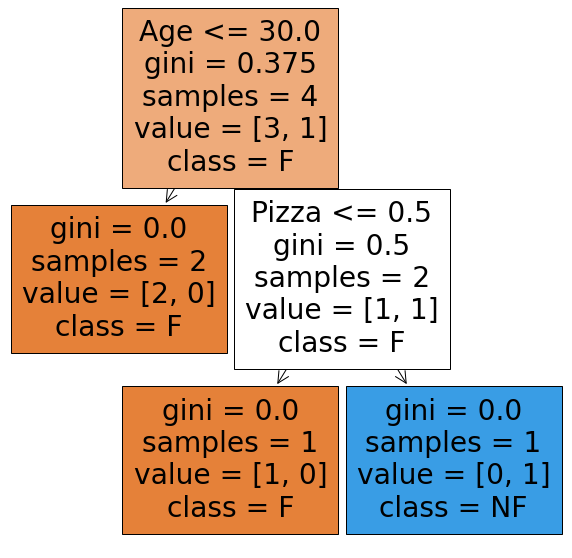

In [8]:
## A graphical representation of the Decision Tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, 
                   feature_names=feats,  
                   class_names=['F','NF'],
                   filled=True)
plt.savefig('tree.eps',format='eps',bbox_inches = "tight")